# 使用线性回归预测某城市的PM2.5数值

只提取了关于PM2.5的数值，并没有考虑其他的气体污染物的数值。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

引入依赖包

In [2]:
# preprocess
data = pd.read_csv('train.csv', header=0)  # 读取数据
grouped = data.groupby(data.columns[2])    # 进行分组，只提取关于PM2.5的数据
pm2_5 = grouped.get_group('PM2.5').loc[:, '0':'23'] 
pm2_5 = pm2_5.astype('float64')   # 进行类型转换
inp = pm2_5.loc[:, '0':'8'].to_numpy()   # 输入信息 转成numpy格式
ans = pm2_5.loc[:, '9'].to_numpy()
m = ans.shape[0]       # 获取数据的长度

这里考虑的比较简单，只提取了前十个小时的数值0点-10点的数值，并没有考虑后面14个小时的数值，因此严格的来说数据是不合格的。

In [3]:
# model
ALPHA = 1e-4   # 学习速率
GAP = 1e-4     #  训练跳出循环的gap
b = 0           # bias
w = np.array([0 for i in range(9)])   # weight
y = lambda x: np.dot(x, w) + b        # function
out = y(inp)    # output
loss = np.sum((ans - out) ** 2) / (2*m)     # RMSE 均值平方差误差
last_loss = loss
loss_list = []    # 用于记录损失的过程，用于图像绘制

先设置好各个参数之后，开始训练

train over, loss is 14.28


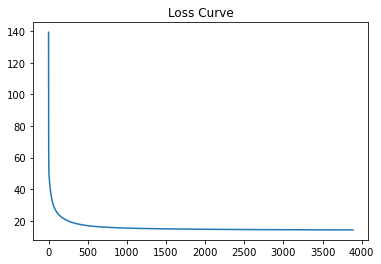

In [4]:
while True:
    der_bias = - np.sum(ans - out) / m
    der_weight = -sum((inp.T*(ans-out)).T)/m
    w = w - ALPHA * der_weight
    b = b - ALPHA * der_bias
    # 重新计算
    out = y(inp)
    loss = np.sum((ans - out) ** 2) / (2*m)
    if abs(loss-last_loss) < GAP:
        break
    if loss > last_loss:
        print('not')
        break
    last_loss = loss
    loss_list.append(loss)

print(f'train over, loss is %.2f' % loss)

# plot loss curve

ts = pd.Series(loss_list)
ts.plot()
plt.title('Loss Curve')
plt.show()

到这里训练结束（**未设置交叉验证集validation**）

In [5]:
# read test.csv

test = pd.read_csv('test.csv',names=['id','items','0','1','2','3','4','5','6','7','8'], index_col=0)
test_data = test.groupby('items').get_group('PM2.5')
test_input = test_data.loc[:,'0':'8'].astype('float64').to_numpy()
test_output = y(test_input)
df = pd.DataFrame(test_output,test_data.index,['value'])
#df.to_csv('ans.csv')
print('test验证集完毕！')
df

test验证集完毕！


,value
id,
id_0,5.159619
id_1,17.057860
id_2,27.607520
id_3,10.051586
id_4,26.248735
...,...
id_235,48.180756
id_236,79.435232
id_237,47.496652


**Kaggle结果：**

kaggle链接:https://www.kaggle.com/c/ml2020spring-hw1/submissions

分数：
[![sfyQwn.png](https://s3.ax1x.com/2021/01/20/sfyQwn.png)](https://imgchr.com/i/sfyQwn)

**总结与展望：**

不足：
* 只取的PM2.5的数据，为提取其他特征，未加入气体污染物之间的关联
* 只提取了0:00am-10:00am的数据，数据量不足
* 未设置交叉验证集
* 训练过程中的学习速率未使用adagrad
* 未进行归一化处理（normalize）
